![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


  # **Cortex Game: Round2--Probability of Giving**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [ ]:
my_folder = "/content/drive/MyDrive/RetoSAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/RetoSAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [ ]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [ ]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [ ]:
pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [ ]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [ ]:
#%%writefile .authinfo
#oda user USR password PSW

Copy this file to home

In [ ]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [ ]:
import saspy
sas_session = saspy.SASsession(cfgfile=os.path.join(
    my_folder,"sascfg_personal.py"))
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 1006



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/RetoSAS/sascfg_personal.py
WORK Path             = /saswork/SAS_work24700001F223_odaws02-usw2-2.oda.sas.com/SAS_work86CD0001F223_odaws02-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 127523


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [ ]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 06:12:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 06:12:00 AM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

### Transform cloud SAS dataset to Python dataframe (pandas)

For reference: 

1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)


2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
import pandas as pd
import numpy as np


data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [ ]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
214678,2214679.0,BORGHESE,RICKY,0.0,67.0,39000.0,University / College,Suburban,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
954527,2954528.0,KAFER,RICHARD,0.0,70.0,249200.0,University / College,Downtown,9.0,2.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [ ]:
cualitativas = ["Woman", "Education", "City","SeniorList","GaveLastYear","GaveThisYear"]
cuantitativas = ["Age", "Salary", "NbActivities", "Referrals", "Recency", "Frequency", "Seniority", "TotalGift", "MinGift", "MaxGift","AmtLastYear","AmtThisYear"]
cuantitativas_sin_y = ["Age", "Salary", "NbActivities", "Referrals", "Recency", "Frequency", "Seniority", "TotalGift", "MinGift", "MaxGift","AmtLastYear"]

## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


In [ ]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.
def deal_missing_values(data): 
  contarLastYear = False
  if contarLastYear:
    # Contando LastYear
    # MinGift
    data.loc[data["GaveLastYear"] == 1 & (data["AmtLastYear"] < data["MinGift"]), "MinGift"] = data["AmtLastYear"]
    # data.loc[(data["GaveLastYear"] == 1) & (np.isnan(data["MinGift"])), "MinGift"] = data.loc[(data["GaveLastYear"] == 1) & (np.isnan(data["MinGift"])),"AmtLastYear"]
    data.loc[(data["GaveLastYear"] == 1) & (np.isnan(data["MinGift"])), "MinGift"] = data["AmtLastYear"]
    data[['MinGift']] = data[['MinGift']].fillna(value=0)

    # Recency
    data.loc[data["GaveLastYear"] == 0,"Recency"] += 1
    data.loc[np.isnan(data["Recency"]) & (data["GaveLastYear"] == 0),"Recency"] = 12.0
    data.loc[data["GaveLastYear"] == 1,"Recency"] = 1.0

    # Frequency
    data.loc[data["GaveLastYear"] == 1,"Frequency"] += 1
    data.loc[np.isnan(data["Frequency"]) & (data["GaveLastYear"] == 1),"Frequency"] = 1
    data[['Frequency']] = data[['Frequency']].fillna(value=0)

    # Seniority
    data[['Seniority']] = data[['Seniority']].fillna(round(data['Seniority'].mean()))

    # TotalGift
    data.loc[data["GaveLastYear"] == 1,"TotalGift"] += data["AmtLastYear"]
    data.loc[np.isnan(data["TotalGift"]) & (data["GaveLastYear"] == 1),"TotalGift"] = data["AmtLastYear"]
    data[['TotalGift']] = data[['TotalGift']].fillna(value=0)

    # MaxGift
    data.loc[data["GaveLastYear"] == 1 & (data["AmtLastYear"] > data["MaxGift"]), "MaxGift"] = data["AmtLastYear"]
    # data.loc[(data["GaveLastYear"] == 1) & (np.isnan(data["MaxGift"])), "MaxGift"] = data.loc[(data["GaveLastYear"] == 1) & (np.isnan(data["MaxGift"])),"AmtLastYear"]
    data.loc[(data["GaveLastYear"] == 1) & (np.isnan(data["MaxGift"])), "MaxGift"] = data["AmtLastYear"]
    data[['MaxGift']] = data[['MaxGift']].fillna(value=0)

  else:

    #Sin Contar LastYear
    data[['MinGift']] = data[['MinGift']].fillna(value=0)
    data[['Recency']] = data[['Recency']].fillna(value=0)
    data[['Frequency']] = data[['Frequency']].fillna(value=0)
    data[['Seniority']] = data[['Seniority']].fillna(value=0)
    data[['TotalGift']] = data[['TotalGift']].fillna(value=0)
    data[['MaxGift']] = data[['MaxGift']].fillna(value=0)

  return data

# data.sample(3)

## Data normalize

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
def normalize_data(data):
  data[cuantitativas_sin_y] = normalize(data[cuantitativas_sin_y], norm='l2')

  return data

## Data standardize

In [ ]:
from sklearn.preprocessing import StandardScaler

def standardize_data(data): 
  scaler = StandardScaler()
  scaler.fit(data[cuantitativas_sin_y])
  transformed = scaler.transform(data[cuantitativas_sin_y])

  data[cuantitativas_sin_y] =  pd.DataFrame(transformed, columns = data[cuantitativas_sin_y].columns)

  return data
# data.head(10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def min_max_data(data): 
  scaler = MinMaxScaler()
  scaler.fit(data[cuantitativas_sin_y])
  transformed = scaler.transform(data[cuantitativas_sin_y])

  data[cuantitativas_sin_y] =  pd.DataFrame(transformed, columns = data[cuantitativas_sin_y].columns)

  return data
# data.head(10)

## One Hot Encoding

In [ ]:
def one_hot_function(data): 

  data = pd.get_dummies(data, columns = ['Education', 'City'])
  return data

# data.head(5)

In [ ]:
data_merge = deal_missing_values(data_merge)
# data_merge = normalize_data(data_merge)
data_merge = standardize_data(data_merge)
# data_merge = min_max_data(data_merge)
data_merge = one_hot_function(data_merge)

In [ ]:
data_merge.loc[np.isnan(data_merge['Age'])]

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban


In [ ]:
data_merge.tail()

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
999995,2999996.0,SCHUBERT,FRANCES,1.0,-0.916647,-0.826057,8.0,2.446410,1.365663,2.103732,...,0.0,0.0,0.0,0,1,0,0,0,0,1
999996,2999997.0,LUGGE,MARY,1.0,-1.286132,-0.958732,10.0,-0.563214,-0.531824,-0.540697,...,0.0,0.0,0.0,0,1,0,0,0,0,1
999997,2999998.0,ROY,REGINALD,0.0,-1.550049,-1.057011,10.0,0.439994,0.416919,-0.011812,...,0.0,0.0,0.0,0,1,0,1,0,0,0
999998,2999999.0,LIBERTI,PAMELA,1.0,-0.758297,-0.354321,0.0,-0.563214,-0.531824,-0.540697,...,0.0,1.0,20.0,0,0,1,0,0,1,0
999999,3000000.0,BELL,SYBIL,1.0,0.191806,-0.215093,4.0,-0.563214,-0.531824,-0.540697,...,0.0,0.0,0.0,0,0,1,0,0,0,1


## Data Partition

In [ ]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.2, random_state=12345) 

#train.head()
train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
980843,2980844.0,ARNDT,JOSEPH,0.0,0.139023,0.657946,2.0,-0.563214,-0.531824,-0.540697,...,1.0,0.0,0.0,0,0,1,0,0,0,1
951443,2951444.0,WILLIAMS,JAMES,0.0,-1.391699,-1.060287,0.0,-0.563214,-0.531824,-0.540697,...,0.0,0.0,0.0,0,0,1,0,1,0,0


# Prebuilt Models

The sk-learn library offers more advanced models. 

sk-learn library: https://scikit-learn.org/stable/index.html  

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
dummies_name = ['Education_Elementary', 'Education_High School', 'Education_University / College', 'City_City', 'City_Downtown', 'City_Rural', 'City_Suburban']
train_columns = ['Age', 'Salary','Contact','MinGift','MaxGift', 'GaveLastYear', 'AmtLastYear','Woman', 'NbActivities'] + dummies_name
# train_columns = ['Contact', 'GaveLastYear','MaxGift', 'AmtLastYear', 'NbActivities', 'Referrals', 'Recency', 'Frequency','Seniority'] + dummies_columns
#comment: it's numpy array
X_train = train[train_columns] 
Y_train = train['GaveThisYear']
X_valid = validation[train_columns] 
Y_valid = validation['GaveThisYear']


regr = LogisticRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [ ]:
from sklearn import metrics

#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

0.14762
0.14762
0.38421348232460556


In [ ]:
#you can change the criteria

import numpy as np
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_valid, regr_predict)
print(confusion_matrix)

[[84359   775]
 [13987   879]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, regr_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     85134
         1.0       0.53      0.06      0.11     14866

    accuracy                           0.85    100000
   macro avg       0.69      0.53      0.51    100000
weighted avg       0.81      0.85      0.80    100000



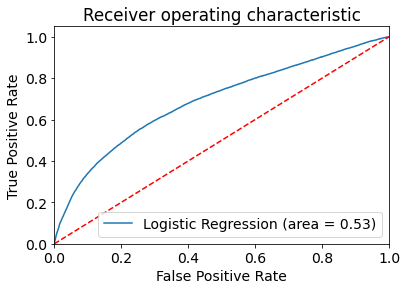

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

logit_roc_auc = roc_auc_score(Y_valid, regr.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, regr.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#comment: it's numpy array

DT_model = DecisionTreeClassifier(max_depth=5,criterion="entropy").fit(X_train,Y_train)
DT_predict_proba = DT_model.predict_proba(X_valid) #Predictions on Testing data
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
# Probabilities for each class
DT_probs = DT_model.predict_proba(X_valid)[:, 1]
print(DT_probs)

[0.11079918 0.16093073 0.48996496 ... 0.17458859 0.07753522 0.10389524]


In [ ]:
#you can change the criteria
import numpy as np
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(Y_valid, DT_predict)
print(confusion_matrix)


[[84413   721]
 [13582  1284]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, DT_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     85134
         1.0       0.64      0.09      0.15     14866

    accuracy                           0.86    100000
   macro avg       0.75      0.54      0.54    100000
weighted avg       0.83      0.86      0.81    100000



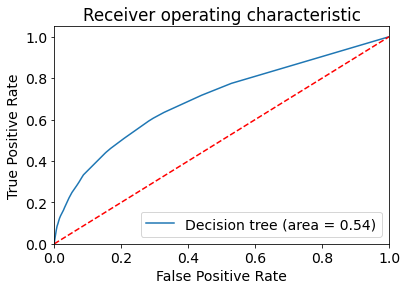

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

DT_roc_auc = roc_auc_score(Y_valid, DT_model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, DT_model.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=123, gamma = 1, learning_rate=0.1, max_depth = 7, reg_lambda=10, scale_pos_weight=3)

xgb_model.fit(X_train,Y_train)

xgb_predict = xgb_model.predict_proba(X_valid)[:, 1]

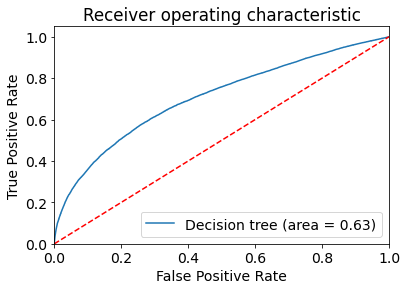

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

DT_roc_auc = roc_auc_score(Y_valid, xgb_model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, xgb_model.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

## Scoring New Data

### Prepare data for scoring

In [ ]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='SCORE_RD2_NOCONTACT',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the Decision Tree model performed better than the Logistic Regression model based on the AUC criterion.

### Predict 'probability of giving' for members who were contacted

In [ ]:
from sklearn import metrics


In [ ]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.

scoring_data_contact = deal_missing_values(scoring_data_contact)
scoring_data_contact = standardize_data(scoring_data_contact)
scoring_data_contact = one_hot_function(scoring_data_contact)

#scoring_data_contact.head()

X = scoring_data_contact[train_columns]

# DT_predict_contact=DT_model.predict_proba(X)[:,1]
# scoring_data_contact['Prediction_prob'] = DT_predict_contact

# clf_predict_contact=clf.predict_proba(X)[:,1]
# scoring_data_contact['Prediction_prob'] = clf_predict_contact

# nn_predict_contact=modelo_nn.predict(X)
# scoring_data_contact['Prediction_prob'] = nn_predict_contact


xgb_predict_contact=xgb_model.predict_proba(X)[:,1]
scoring_data_contact['Prediction_prob'] = xgb_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction_prob']]
scoring_data_contact = scoring_data_contact.rename({'Prediction_prob': 'ProbContact'}, axis=1) 
scoring_data_contact.head()

,ID,ProbContact
0,2000001.0,0.454884
1,2000002.0,0.825565
2,2000003.0,0.875159
3,2000004.0,0.614533
4,2000005.0,0.859859


### Predict 'probability of giving' for members who were not contacted

In [ ]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.

scoring_data_nocontact = deal_missing_values(scoring_data_nocontact)
scoring_data_nocontact = standardize_data(scoring_data_nocontact)
scoring_data_nocontact = one_hot_function(scoring_data_nocontact) 

#scoring_data_contact.head()

X = scoring_data_nocontact[train_columns] 

# DT_predict_nocontact=DT_model.predict_proba(X)[:,1]
# scoring_data_nocontact['Prediction_prob'] = DT_predict_nocontact

# clf_predict_nocontact=clf.predict_proba(X)[:,1]
# scoring_data_nocontact['Prediction_prob'] = clf_predict_nocontact

# nn_predict_nocontact=modelo_nn.predict(X)
# scoring_data_nocontact['Prediction_prob'] = nn_predict_nocontact

xgb_predict_nocontact=xgb_model.predict_proba(X)[:,1]
scoring_data_nocontact['Prediction_prob'] = xgb_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction_prob']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction_prob': 'ProbNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,ProbNoContact
0,2000001.0,0.449187
1,2000002.0,0.212265
2,2000003.0,0.165441
3,2000004.0,0.157174
4,2000005.0,0.163789


In [ ]:
result_Prob = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Prob.sort_values(by=['ID'], inplace=True)
result_Prob.sample(10)

,ID,ProbContact,ProbNoContact
593629,2593630.0,0.639088,0.211450
513576,2513577.0,0.405126,0.192777
870653,2870654.0,0.506648,0.218580
597332,2597333.0,0.870984,0.405965
488843,2488844.0,0.722506,0.347602
889837,2889838.0,0.599697,0.535786
261025,2261026.0,0.574777,0.251676
159311,2159312.0,0.795685,0.319611
698301,2698302.0,0.615858,0.263420
850841,2850842.0,0.636554,0.197183


## Exporting Results to a CSV File

In [ ]:
result_Prob.to_csv('Round2_Output_prob2.csv', index=False)

In [ ]:
import pandas as pd


probabilities = pd.read_csv("Round2_Output_prob2.csv")
amounts = pd.read_csv("Round2_Output_amt.csv")

def Calc_Uplift(raw_data):
    return ((raw_data['AmtContact']*raw_data['ProbContact']) - (raw_data['AmtNoContact']*raw_data['ProbNoContact']))

raw_submission = pd.merge(probabilities, amounts, on=["ID"], how="right")
raw_submission["Uplift"] = raw_submission.apply(lambda row: Calc_Uplift(row), axis=1)

# Sorting data by descending Uplift value
raw_submission.sort_values(by=['Uplift'], ascending=False, inplace=True)


In [ ]:
for num, raw in enumerate(raw_submission["Uplift"]):
  if raw < 25:
    break

print(num)

NB = num-1

201302


In [ ]:
# Export the final csv file
submission = raw_submission.head(179000)

submission.to_csv('Round2 Output final21.csv', index=False)


In [ ]:
# Congratulations! You are now done with Round 2. You are ready to prepare your solution to upload it to the leaderboard.

In [ ]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.

In [ ]:
!head Round2\ Output\ final.csv

ID,ProbContact,ProbNoContact,AmtContact,AmtNoContact,Uplift
2631812.0,0.1564297643347559,0.1564297643347559,124.51428808093588,125.54302209645896,-0.1609246196114178
2056333.0,0.1564297643347559,0.1564297643347559,68.65201346622842,69.6807474817515,-0.16092461961141957
2815166.0,0.1564297643347559,0.1564297643347559,76.97825150520296,78.00698552072603,-0.16092461961141957
2263378.0,0.1564297643347559,0.1564297643347559,99.56577332489236,100.59450734041542,-0.16092461961141957
2758383.0,0.1564297643347559,0.1564297643347559,85.28400190536678,86.31273592088985,-0.16092461961141957
2125595.0,0.1564297643347559,0.1564297643347559,64.61319606520473,65.6419300807278,-0.16092461961141957
2207413.0,0.1564297643347559,0.1564297643347559,89.53529282621321,90.56402684173628,-0.16092461961141957
2646366.0,0.1564297643347559,0.1564297643347559,64.57416196256739,65.60289597809046,-0.16092461961141957
2646407.0,0.1564297643347559,0.1564297643347559,82.5508215925048,83.57955560802787,-0.16092461961141